In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
df = pd.read_csv("Crops.csv")

In [30]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [31]:
df.shape

(2200, 8)

In [32]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [33]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [34]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [35]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [37]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [38]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [39]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


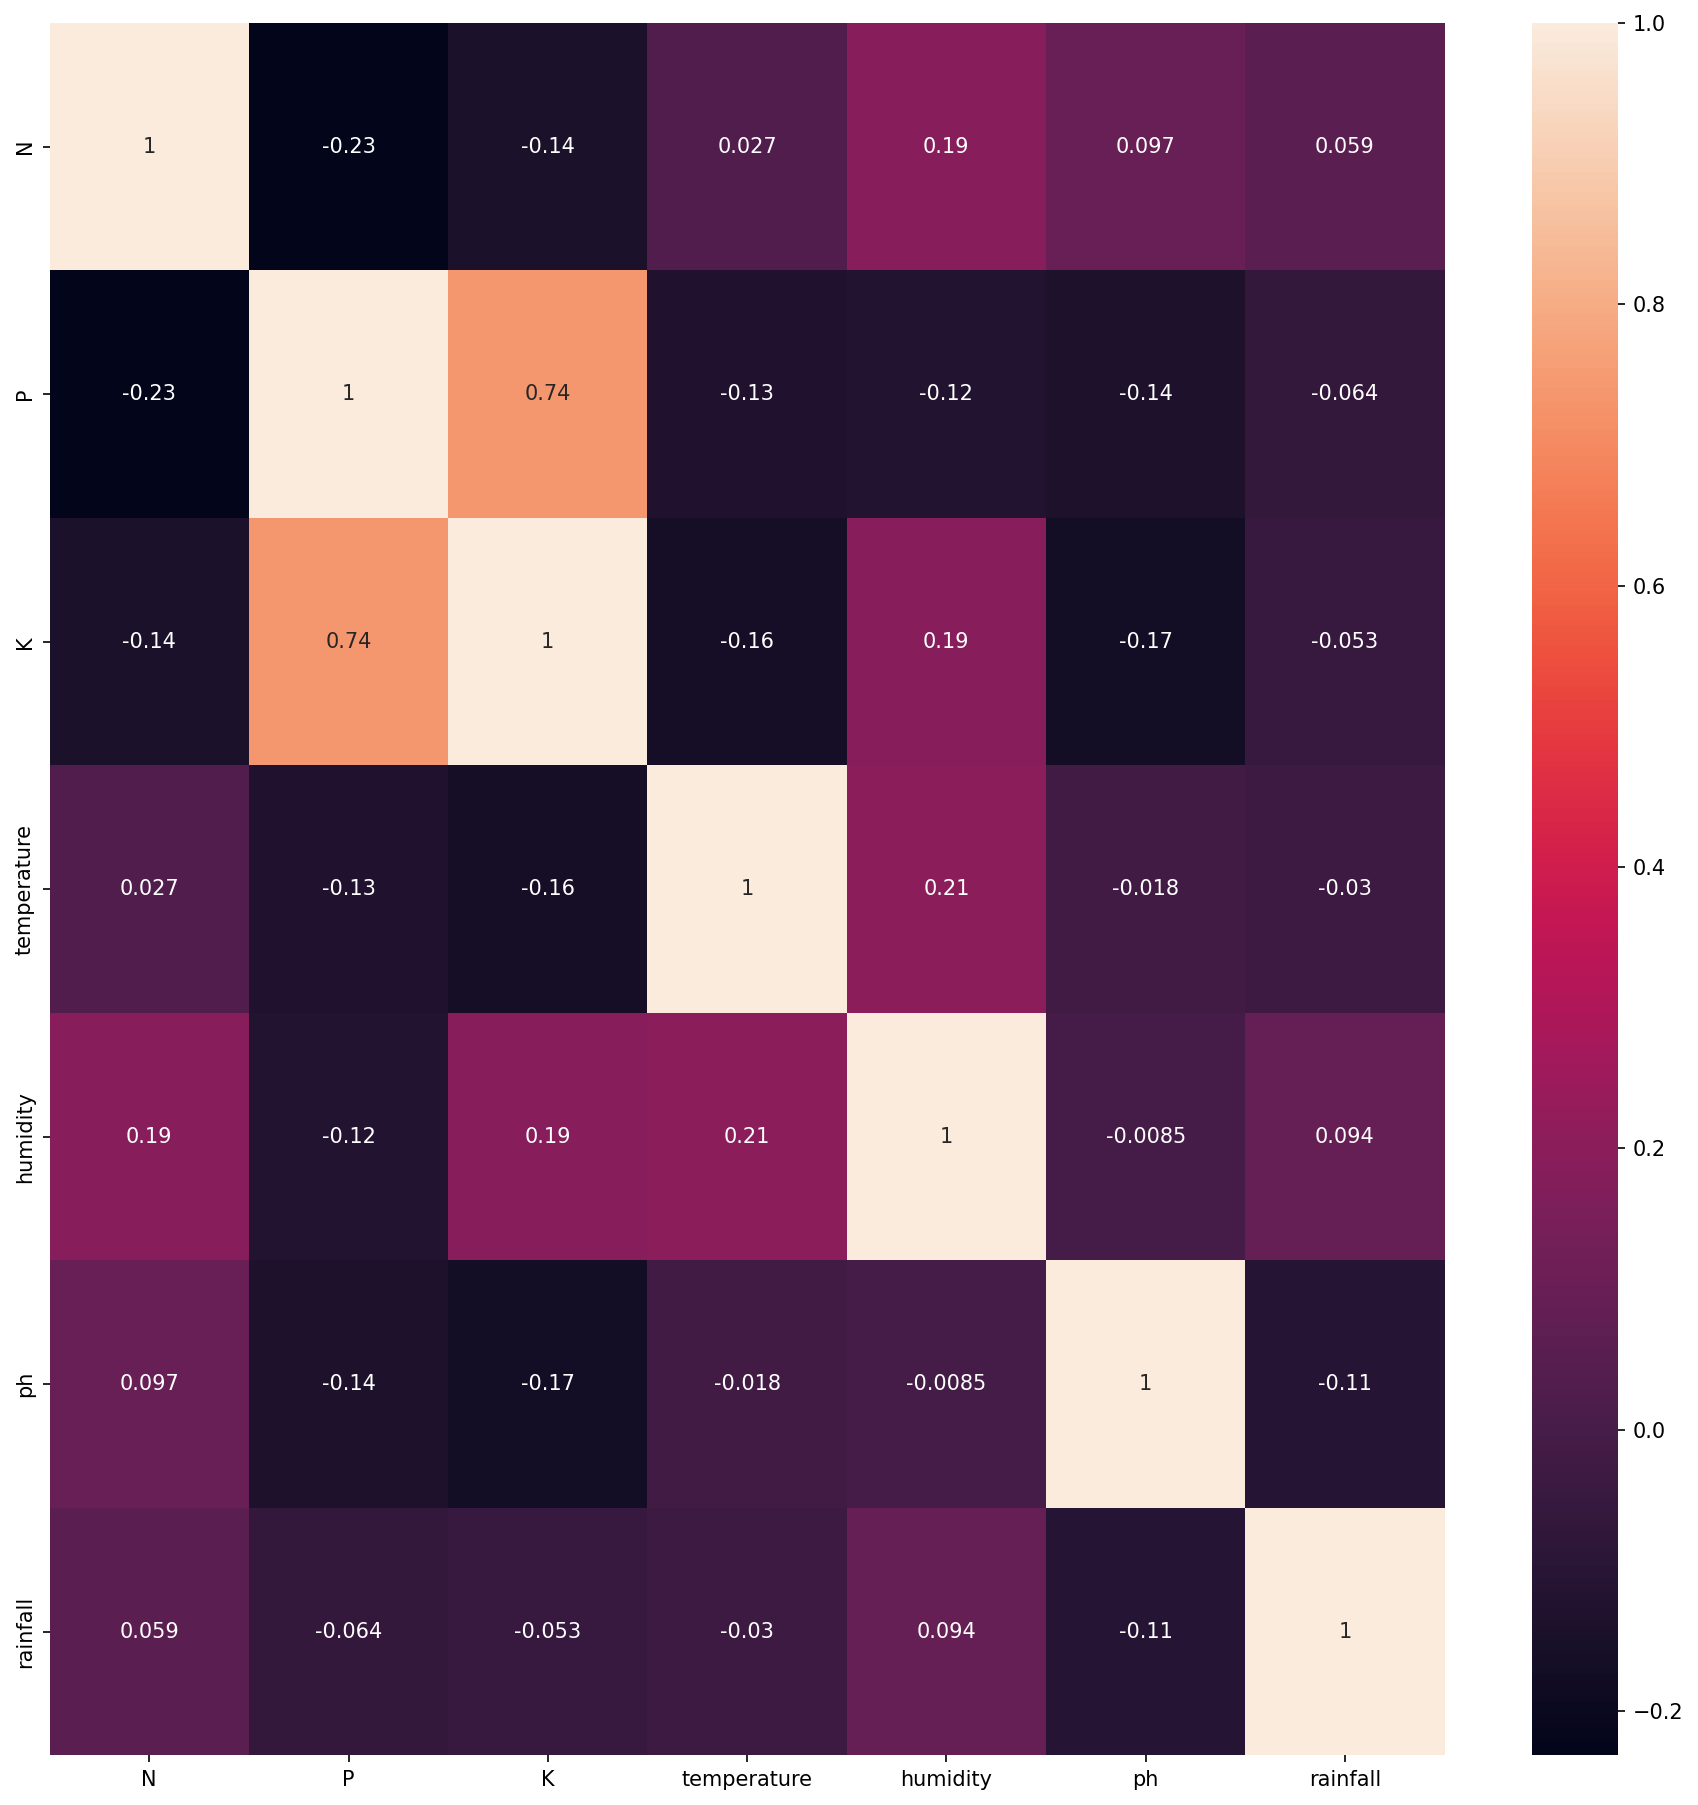

In [40]:
# Exclude non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True)
plt.show()


In [41]:
plt.rcParams['figure.figsize'] = (15, 15)
plt.rcParams['figure.dpi'] = 150

<ipython-input-42-866b38029269>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['N'], color='greenyellow')
<ipython-input-42-866b38029269>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['P'], color='firebrick')
<ipython-input-42-866b38029269>:15: UserWarning: 

`distplot` is a deprecate

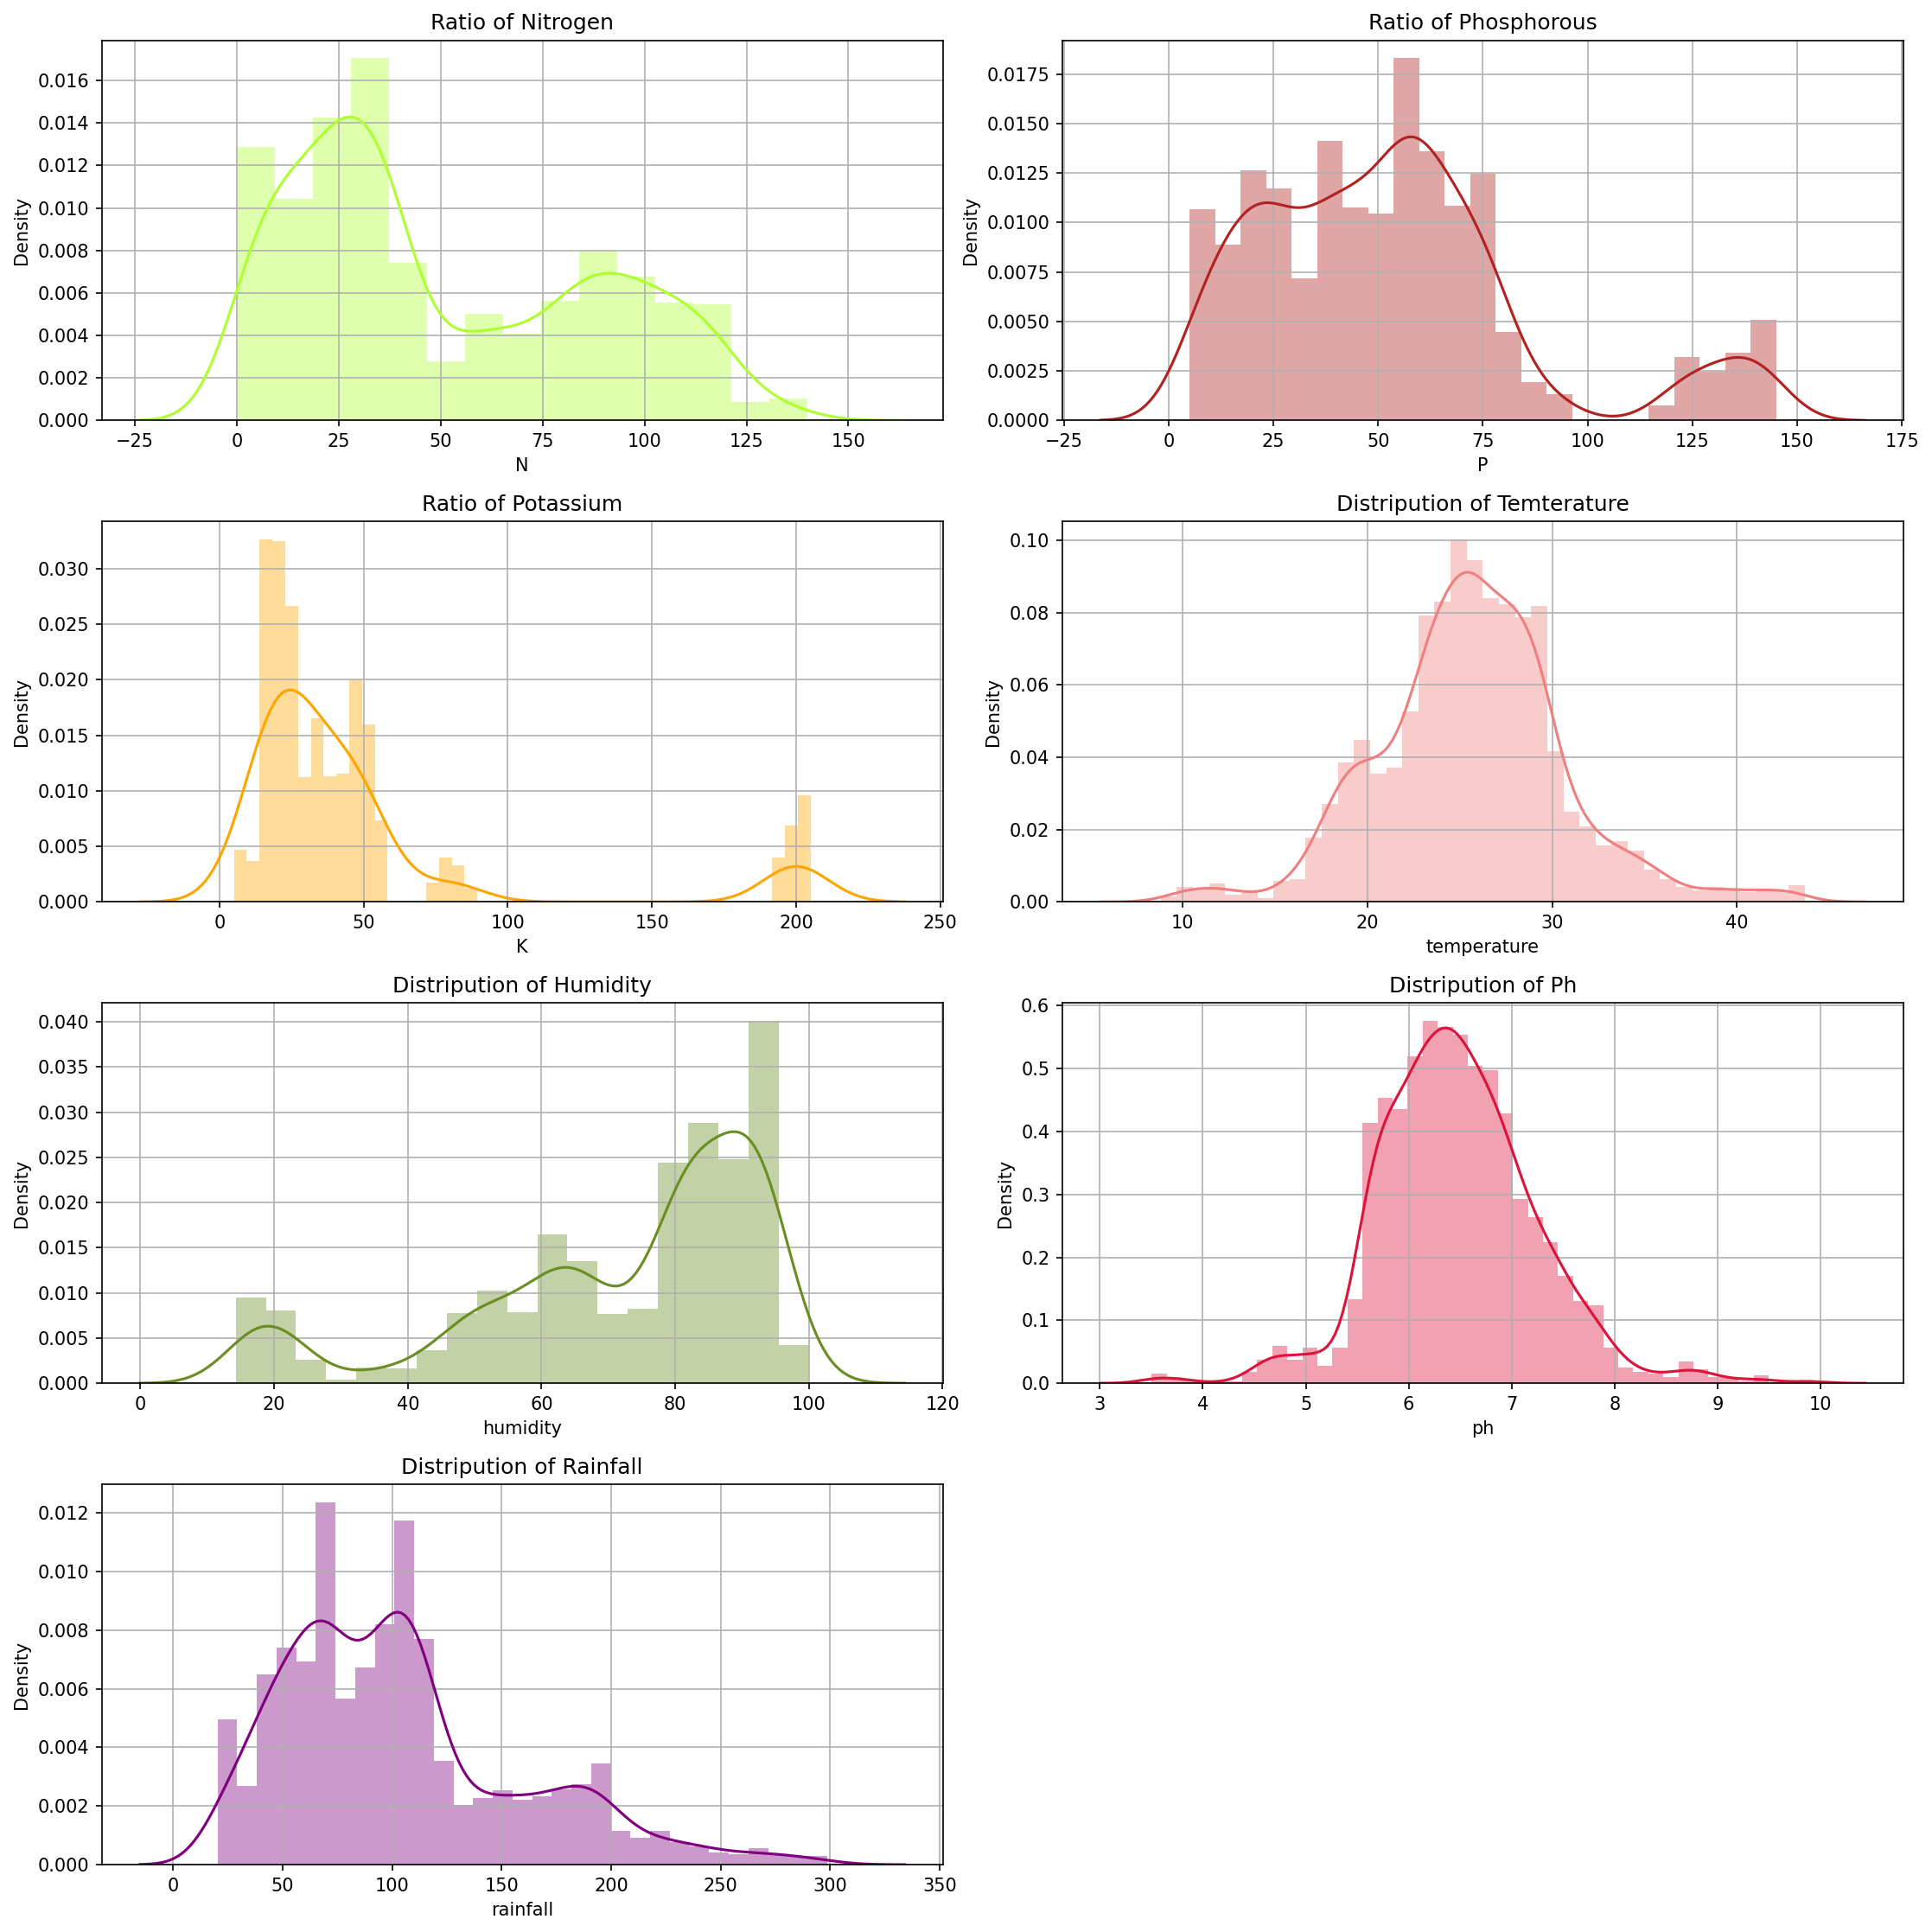

In [42]:
plt.subplot(4, 2, 1)
sns.distplot(df['N'], color='greenyellow')
plt.title('Ratio of Nitrogen', fontsize = 12)
plt.tight_layout()
plt.grid()

plt.subplot(4, 2, 2)
sns.distplot(df['P'], color='firebrick')
plt.title('Ratio of Phosphorous', fontsize = 12)
plt.tight_layout()
plt.grid()


plt.subplot(4, 2, 3)
sns.distplot(df['K'], color = 'orange')
plt.title('Ratio of Potassium', fontsize = 12)
plt.tight_layout()
plt.grid()


plt.subplot(4, 2, 4)
sns.distplot(df['temperature'], color = 'lightcoral')
plt.title('Distripution of Temterature', fontsize = 12)
plt.tight_layout()
plt.grid()


plt.subplot(4, 2, 5)
sns.distplot(df['humidity'], color = 'olivedrab')
plt.title('Distripution of Humidity', fontsize = 12)
plt.tight_layout()
plt.grid()

plt.subplot(4, 2, 6)
sns.distplot(df['ph'], color = 'crimson')
plt.title('Distripution of Ph', fontsize = 12)
plt.tight_layout()
plt.grid()


plt.subplot(4, 2, 7)
sns.distplot(df['rainfall'], color = 'purple')
plt.title('Distripution of Rainfall', fontsize = 12)
plt.tight_layout()
plt.grid()

<Axes: xlabel='temperature', ylabel='rainfall'>

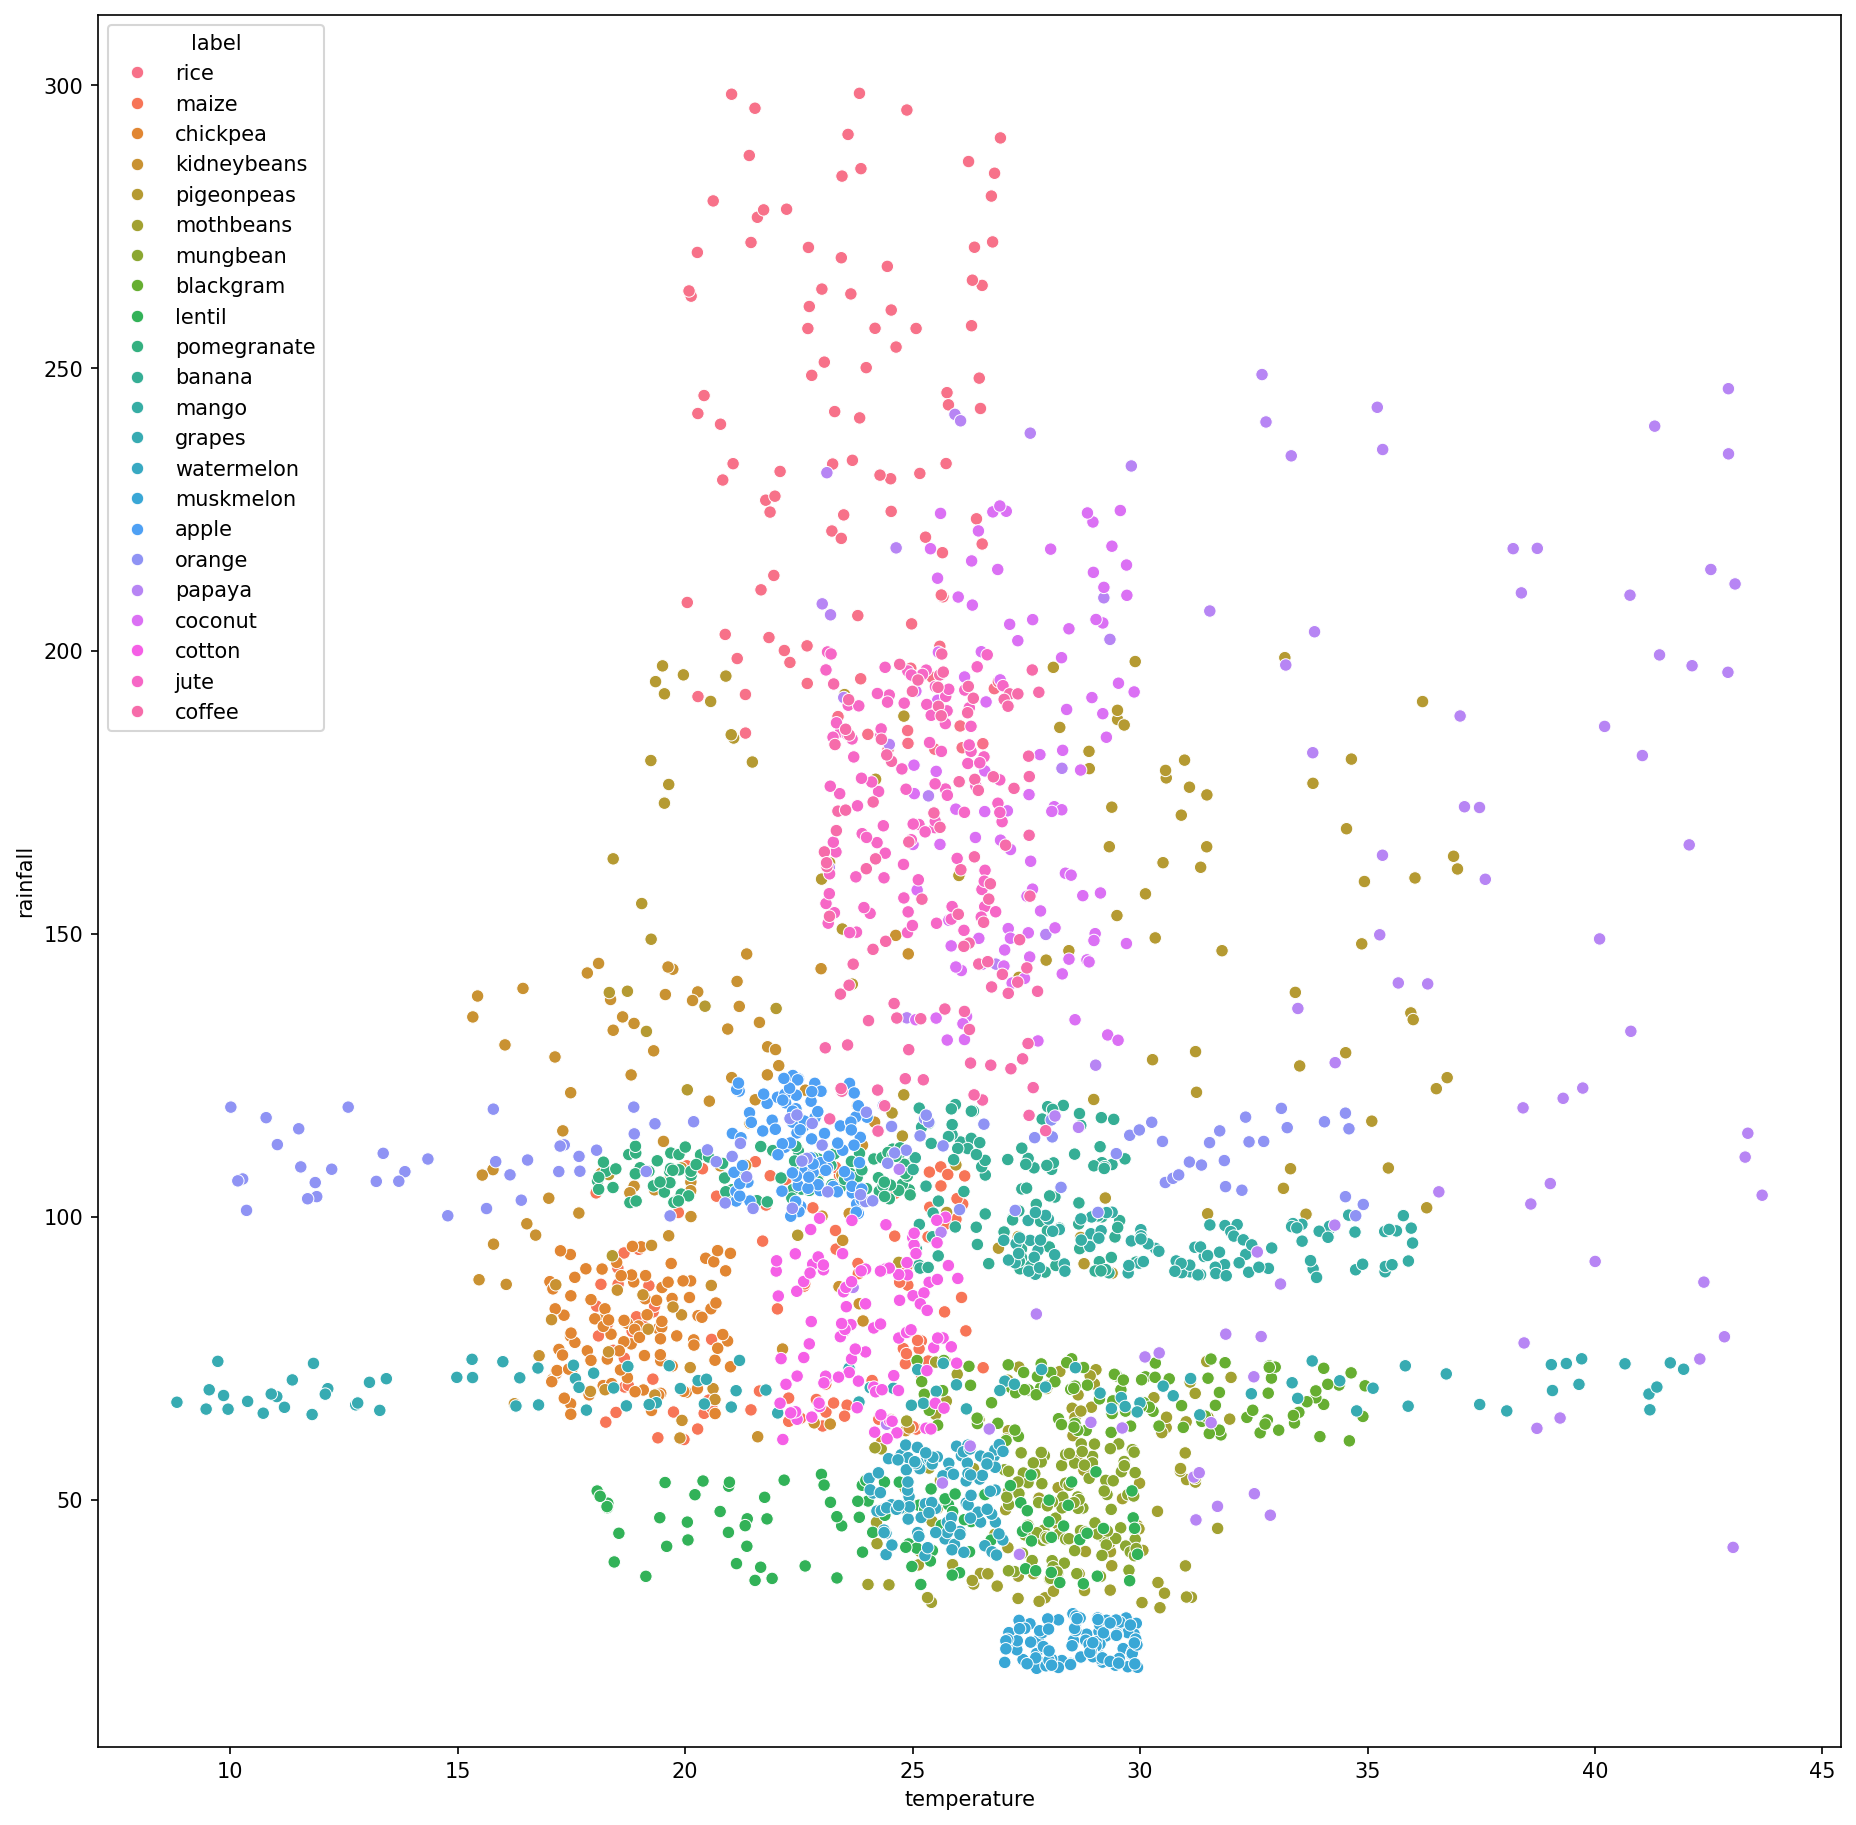

In [43]:
sns.scatterplot( x = df['temperature'], y = df['rainfall'], hue = df['label'])

In [44]:
X = df.iloc[:,:-1]
y = df["label"]

print("Shape of X:",X.shape)
print("Shape of y:",y.shape)

Shape of X: (2200, 7)
Shape of y: (2200,)


In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [46]:
print("Shape of X train:",X_train.shape)
print("Shape of y train:",y_train.shape)
print("Shape of X test:",X_test.shape)
print("Shape of y test:",y_test.shape)

Shape of X train: (1760, 7)
Shape of y train: (1760,)
Shape of X test: (440, 7)
Shape of y test: (440,)


In [47]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
print("Accuracy : ",accuracy_score(y_test,y_pred))

Accuracy :  0.9681818181818181


In [49]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [50]:
print("Accuracy :",accuracy_score(y_test,y_pred))

Accuracy : 0.9954545454545455


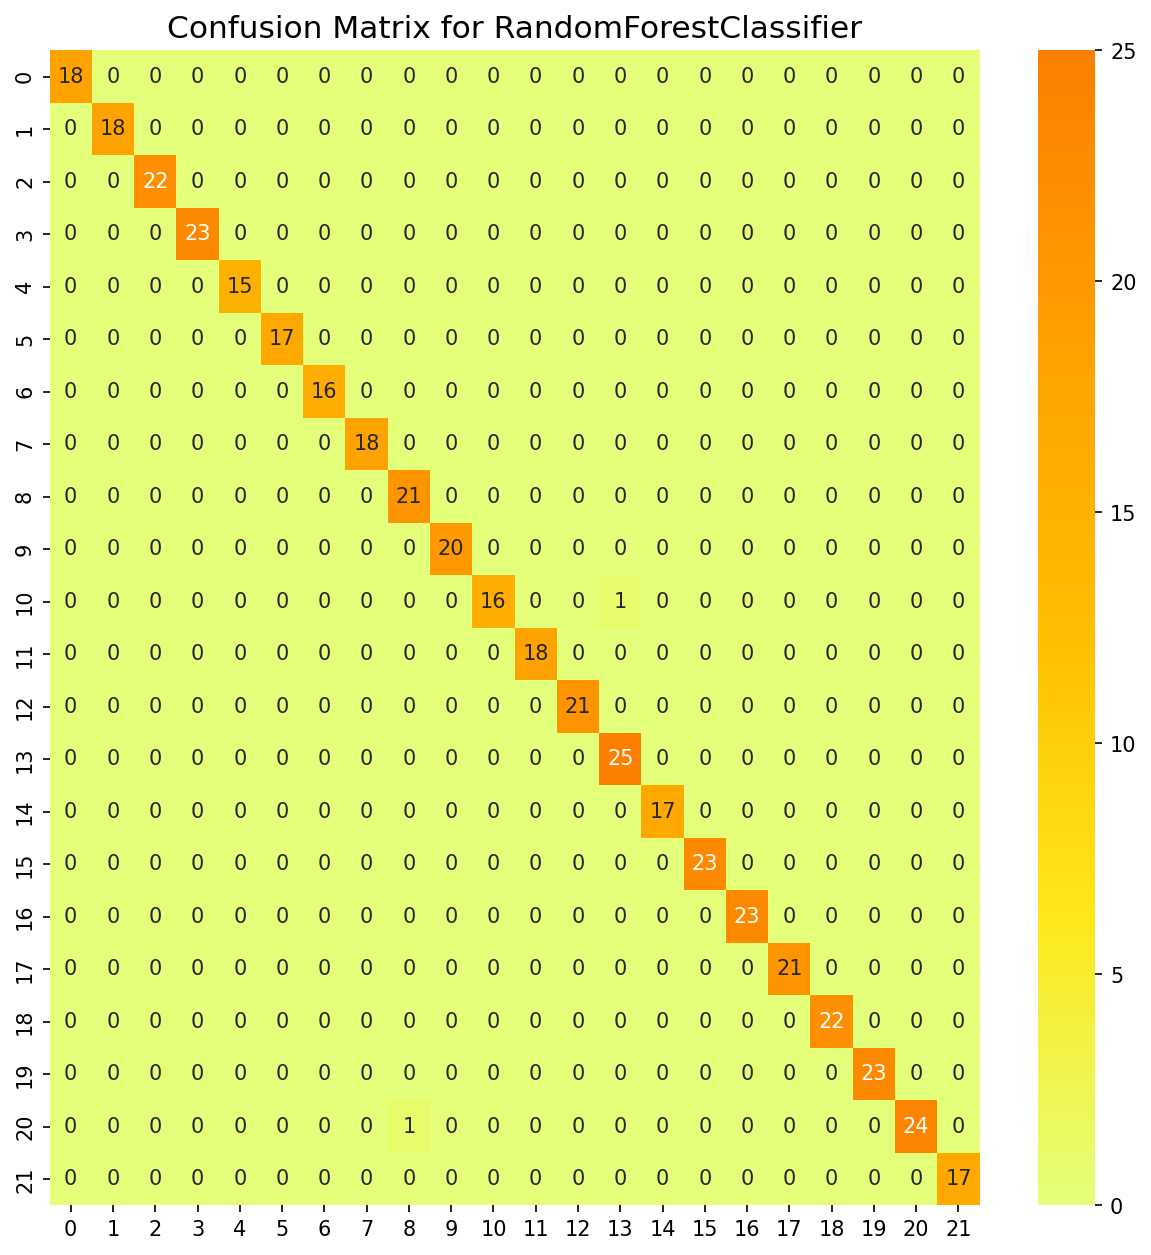

In [51]:
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True,cmap='Wistia')
plt.title("Confusion Matrix for RandomForestClassifier", fontsize=15)
plt.show()

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       0.95      1.00      0.98        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      0.94      0.97        17
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.96      1.00      0.98        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [53]:
prediction = model.predict(np.array([[6,66,15,34.93,30.40,6.34,159.26]]))

print("Suggested crop for given climatic condition: ",prediction)

Suggested crop for given climatic condition:  ['pigeonpeas']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
